In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from datetime import datetime


In [2]:
# stop warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('../scripts')

In [5]:
import pandas as pd

# Load the two CSV files into DataFrames
df1 = pd.read_csv('../scripts/scraped_data.csv')
df2 = pd.read_csv('../scripts/scraped_images.csv')

# Concatenate the DataFrames vertically
concat_df = pd.concat([df1, df2])

# Optionally, drop duplicate rows (if needed)
concat_df = concat_df.drop_duplicates()

# Save the concatenated DataFrame to a new CSV file
concat_df.to_csv('../scripts/merged_data.csv', index=False)

print("CSV files have been successfully merged!")



CSV files have been successfully merged!


In [6]:
# Load your CSV file
try:
    df = pd.read_csv('../scripts/merged_data.csv')
    logging.info(f"Loaded CSV file with {len(df)} rows and {len(df.columns)} columns")
    print(f"Loaded CSV file with {len(df)} rows and {len(df.columns)} columns")
    display(df.head())
except Exception as e:
    logging.error(f'Error loading data: {str(e)}')
    print(f'Error loading data: {str(e)}')

Loaded CSV file with 5809 rows and 6 columns


,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Doctors Ethiopia,@DoctorsET,1,NaN,2019-03-30 18:58:34+00:00,NaN
1,Doctors Ethiopia,@DoctorsET,3,DoctorsEthiopia on LTV,2019-04-20 22:32:49+00:00,photos\@DoctorsET_3.jpg
2,Doctors Ethiopia,@DoctorsET,5,Production crew!\nDoctorsEthiopia,2019-04-21 06:44:30+00:00,photos\@DoctorsET_5.jpg
3,Doctors Ethiopia,@DoctorsET,6,NaN,2019-04-21 17:34:18+00:00,photos\@DoctorsET_6.jpg
4,Doctors Ethiopia,@DoctorsET,7,ማይግሬንን እንዴት ልከላከል?\nማይግሬን የማይድን በሽታ ቢሆንም የሚከሰት...,2019-04-21 17:37:45+00:00,NaN


In [7]:
# Remove duplicates
original_shape = df.shape
df.drop_duplicates(inplace=True)
logging.info(f"Removed duplicates. New shape: {df.shape}")
print(f"Original shape: {original_shape}, New shape after removing duplicates: {df.shape}")

Original shape: (5809, 6), New shape after removing duplicates: (5809, 6)


In [8]:
# Handle missing values
missing_before = df.isnull().sum()
df.fillna({'Channel Title': 'Unknown', 
           'Channel Username': 'Unknown', 
           'Message': 'No message', 
           'Media Path': 'No media'}, inplace=True)
missing_after = df.isnull().sum()
logging.info("Filled missing values")
print("Missing values before:")
display(missing_before)
print("\nMissing values after:")
display(missing_after)

Missing values before:


Channel Title          0
Channel Username       0
ID                     0
Message             2195
Date                   0
Media Path           387
dtype: int64


Missing values after:


Channel Title       0
Channel Username    0
ID                  0
Message             0
Date                0
Media Path          0
dtype: int64

In [9]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
logging.info("Converted 'Date' column to datetime")
print("Date column info:")
display(df['Date'].info())

Date column info:
<class 'pandas.core.series.Series'>
RangeIndex: 5809 entries, 0 to 5808
Series name: Date
Non-Null Count  Dtype              
--------------  -----              
5809 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 45.5 KB


None

In [10]:
# Remove rows with invalid dates
rows_before = len(df)
df = df.dropna(subset=['Date'])
rows_after = len(df)
logging.info(f"Removed rows with invalid dates. New shape: {df.shape}")
print(f"Rows removed due to invalid dates: {rows_before - rows_after}")

Rows removed due to invalid dates: 0


In [11]:
# Ensure 'ID' is unique
duplicates_before = df['ID'].duplicated().sum()
df.drop_duplicates(subset=['ID'], keep='first', inplace=True)
duplicates_after = df['ID'].duplicated().sum()
logging.info(f"Ensured 'ID' is unique. New shape: {df.shape}")
print(f"Duplicate IDs removed: {duplicates_before - duplicates_after}")

Duplicate IDs removed: 1404


In [12]:
# Trim whitespace from string columns
string_columns = ['Channel Title', 'Channel Username', 'Message', 'Media Path']
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())
logging.info("Trimmed whitespace from string columns")
print("Sample of cleaned string columns:")
display(df[string_columns].head())

Sample of cleaned string columns:


,Channel Title,Channel Username,Message,Media Path
0,Doctors Ethiopia,@DoctorsET,No message,No media
1,Doctors Ethiopia,@DoctorsET,DoctorsEthiopia on LTV,photos\@DoctorsET_3.jpg
2,Doctors Ethiopia,@DoctorsET,Production crew!\nDoctorsEthiopia,photos\@DoctorsET_5.jpg
3,Doctors Ethiopia,@DoctorsET,No message,photos\@DoctorsET_6.jpg
4,Doctors Ethiopia,@DoctorsET,ማይግሬንን እንዴት ልከላከል?\nማይግሬን የማይድን በሽታ ቢሆንም የሚከሰት...,No media


In [13]:
# Validate 'Channel Username' format
usernames_fixed = sum(~df['Channel Username'].str.startswith('@'))
df['Channel Username'] = df['Channel Username'].apply(lambda x: '@' + x if not x.startswith('@') else x)
logging.info("Ensured 'Channel Username' starts with @")
print(f"Number of usernames fixed: {usernames_fixed}")

Number of usernames fixed: 0


In [14]:
# Data summary
logging.info(f"Cleaned DataFrame shape: {df.shape}")
logging.info(f"Columns: {df.columns.tolist()}")
logging.info(f"Data types:\n{df.dtypes}")
print("Cleaned DataFrame summary:")
display(df.info())
print("\nDescriptive statistics:")
display(df.describe(include='all'))

Cleaned DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
Index: 4405 entries, 0 to 5808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Channel Title     4405 non-null   object             
 1   Channel Username  4405 non-null   object             
 2   ID                4405 non-null   int64              
 3   Message           4405 non-null   object             
 4   Date              4405 non-null   datetime64[ns, UTC]
 5   Media Path        4405 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 240.9+ KB


None


Descriptive statistics:


,Channel Title,Channel Username,ID,Message,Date,Media Path
count,4405,4405,4405.000000,4405,4405,4405
unique,5,5,NaN,983,NaN,4125
top,Lobelia pharmacy and cosmetics,@lobelia4cosmetics,NaN,No message,NaN,No media
freq,2344,2344,NaN,1377,NaN,281
mean,NaN,NaN,6482.465380,NaN,2023-09-27 00:37:41.466288384+00:00,NaN
min,NaN,NaN,1.000000,NaN,2019-03-30 18:58:34+00:00,NaN
25%,NaN,NaN,1113.000000,NaN,2023-09-02 17:37:14+00:00,NaN
50%,NaN,NaN,10155.000000,NaN,2024-07-20 13:36:07+00:00,NaN
75%,NaN,NaN,11281.000000,NaN,2024-08-23 10:29:27+00:00,NaN
max,NaN,NaN,12411.000000,NaN,2024-10-10 14:47:05+00:00,NaN


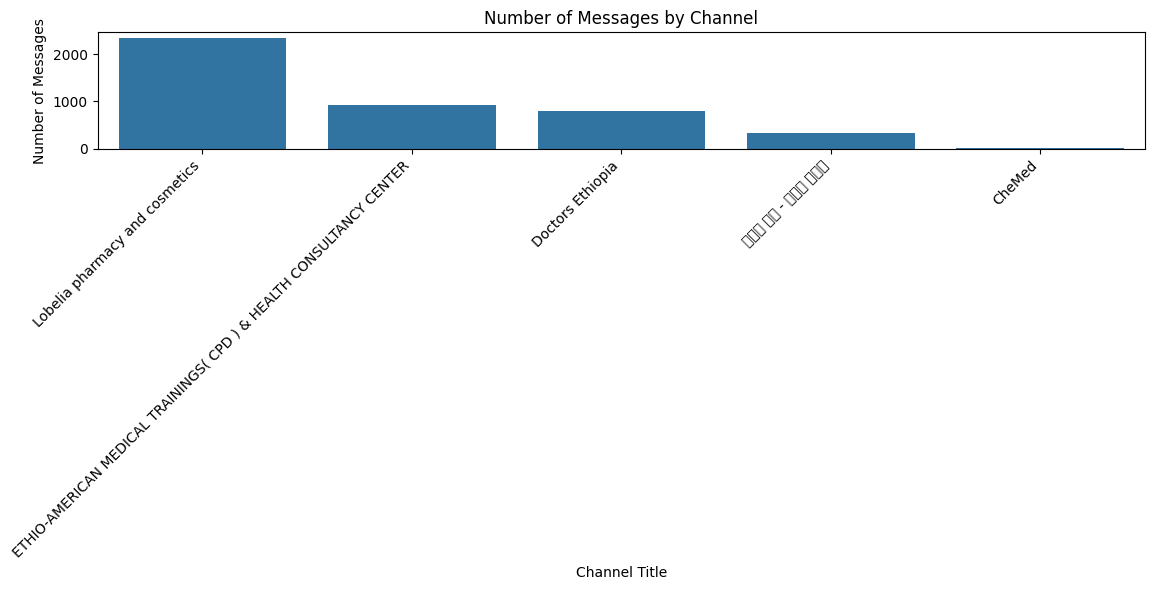

In [15]:
# Visualize message distribution by channel
plt.figure(figsize=(12, 6))
channel_counts = df['Channel Title'].value_counts()
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Number of Messages by Channel')
plt.xlabel('Channel Title')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

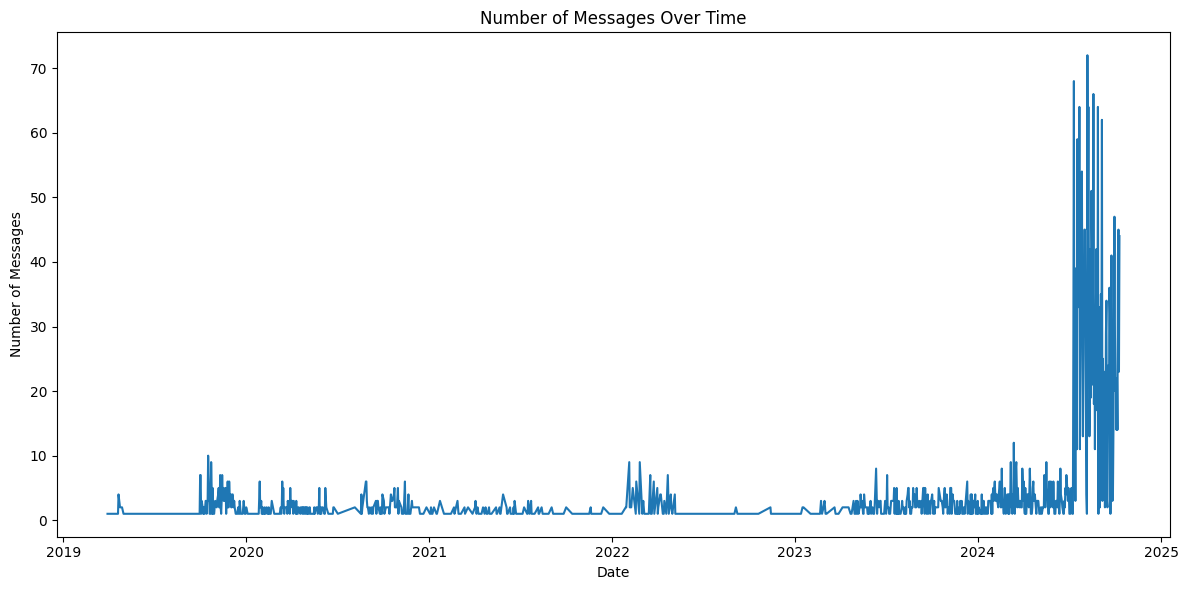

In [16]:
# visualize message distribution over time
plt.figure(figsize=(12, 6))
df['Date'].dt.date.value_counts().sort_index().plot()
plt.title('Number of Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

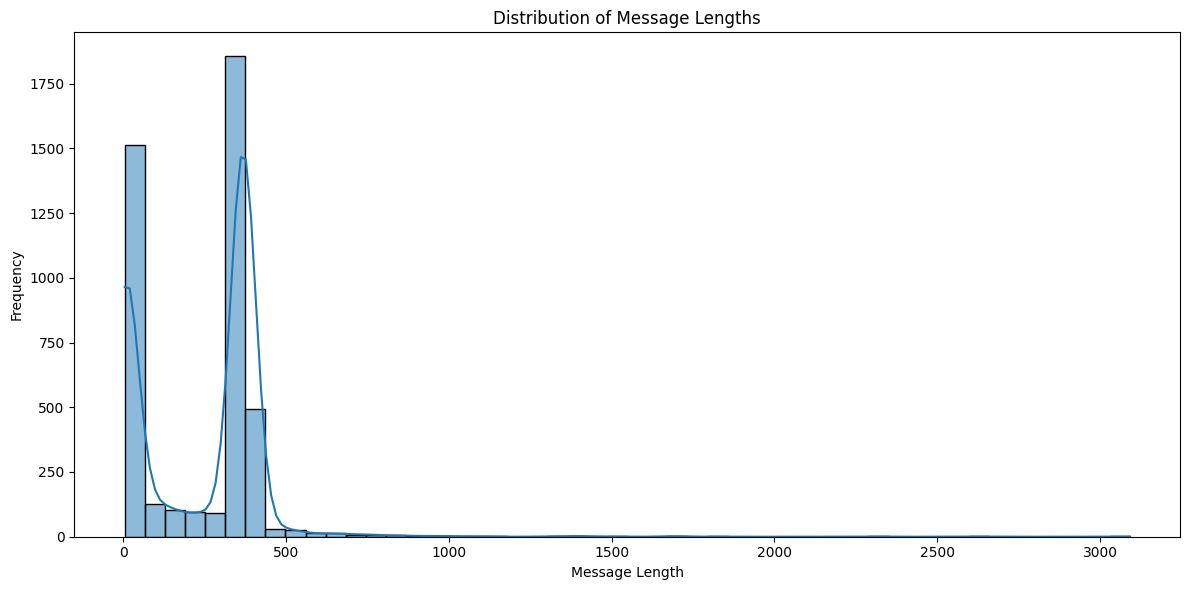

In [17]:
# Analyze message lengths
df['Message_Length'] = df['Message'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(df['Message_Length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

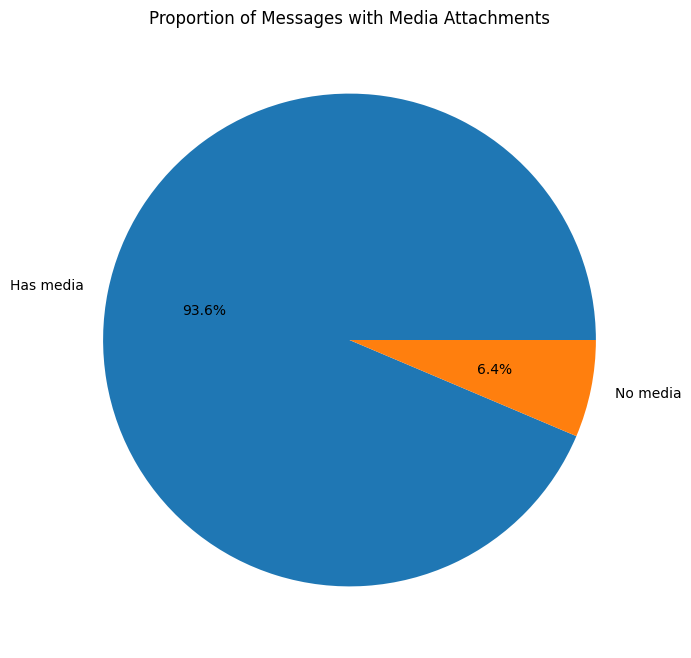

In [18]:
# Check for media attachments
media_counts = df['Media Path'].apply(lambda x: 'No media' if x == 'No media' else 'Has media').value_counts()
plt.figure(figsize=(8, 8))
plt.pie(media_counts.values, labels=media_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Messages with Media Attachments')
plt.show()

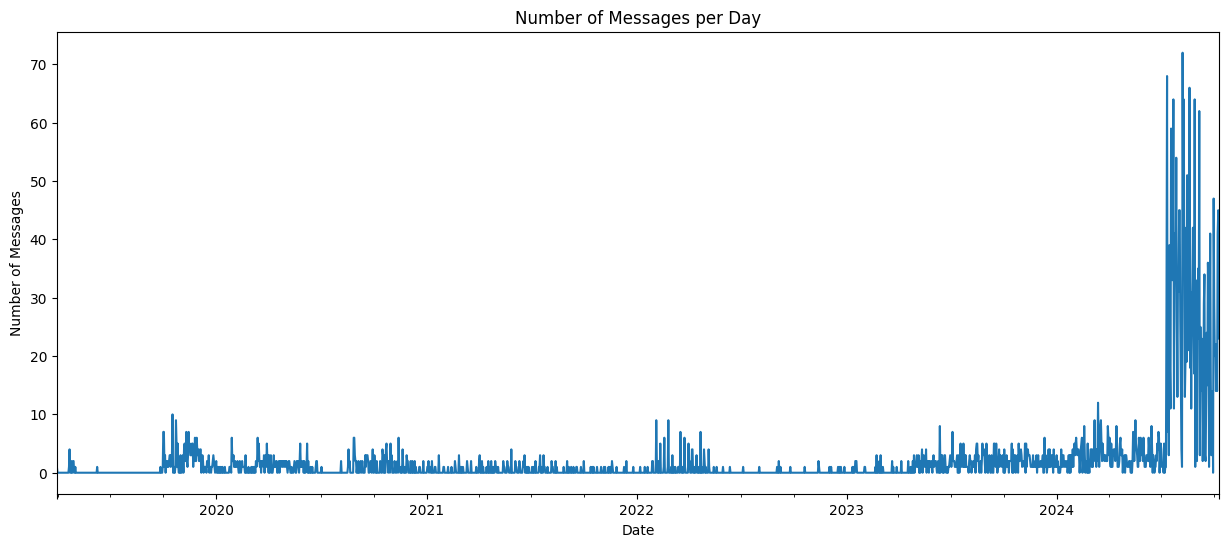

Day with most messages: 2024-08-07 00:00:00+00:00 (72 messages)
Day with least messages: 2019-03-31 00:00:00+00:00 (0 messages)


In [20]:
# Time Series Analysis - Messages per Day
df['Date'] = pd.to_datetime(df['Date'])
messages_per_day = df.resample('D', on='Date').size()

plt.figure(figsize=(15, 6))
messages_per_day.plot()
plt.title('Number of Messages per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

print(f"Day with most messages: {messages_per_day.idxmax()} ({messages_per_day.max()} messages)")
print(f"Day with least messages: {messages_per_day.idxmin()} ({messages_per_day.min()} messages)")

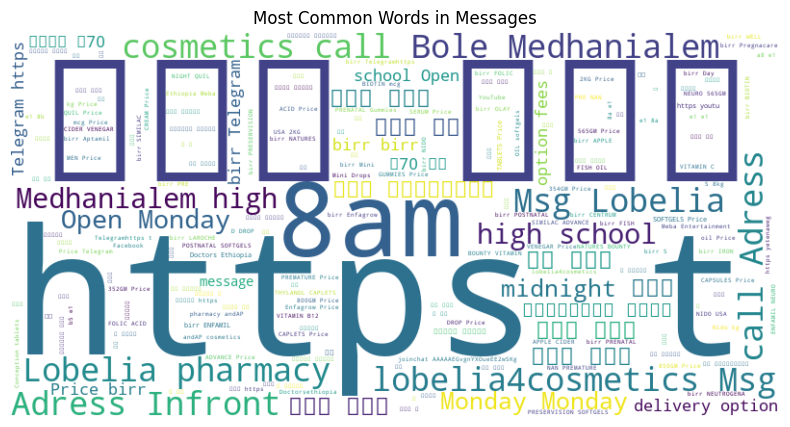

In [23]:
# Word Cloud of Most Common Words
from wordcloud import WordCloud

# Combine all messages into a single string
text = ' '.join(df['Message'])

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Messages')
plt.show()

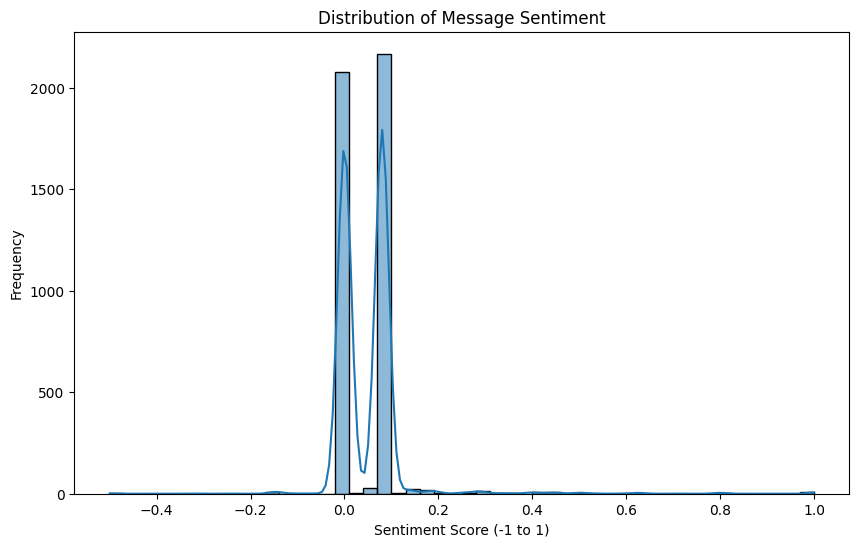

Average sentiment score: 0.05


In [24]:
# Sentiment Analysis (using TextBlob for simplicity)
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['Message'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Message Sentiment')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.show()

print(f"Average sentiment score: {df['sentiment'].mean():.2f}")

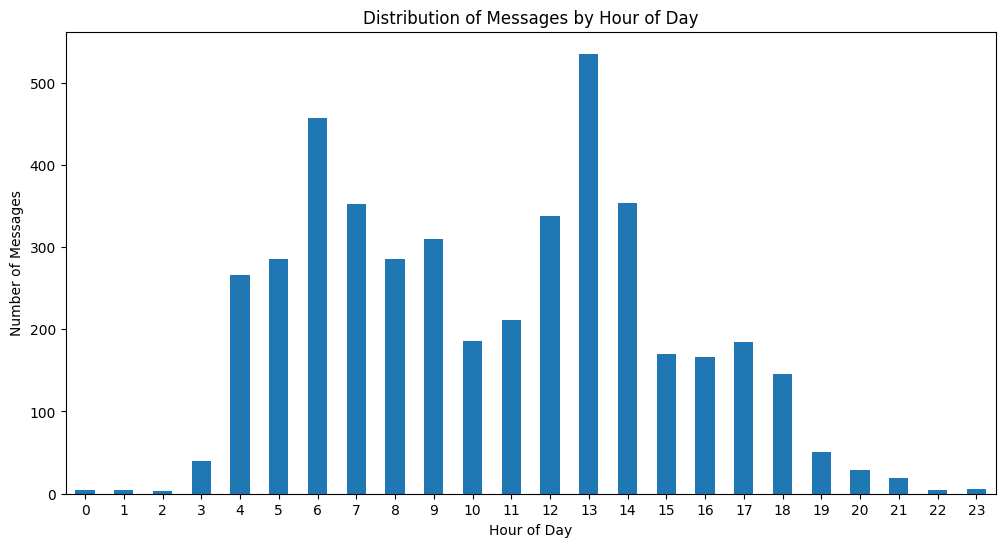

Most active hour:df['hour'] = df['Date'].dt.hour


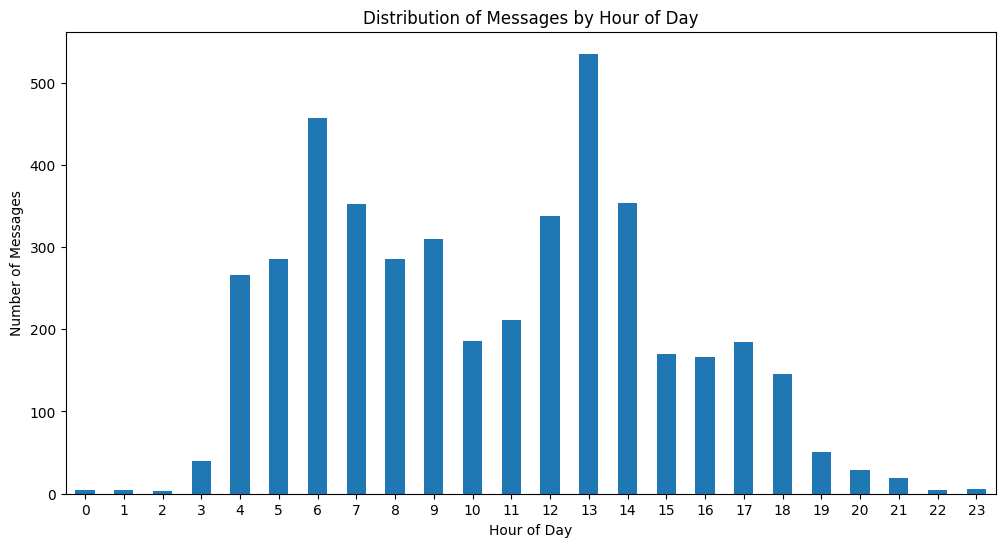

Most active hour: 13:00 - 14:00


In [25]:
# Time of Day Analysis
df['hour'] = df['Date'].dt.hour

plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Messages by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print (f"Most active hour:df['hour'] = df['Date'].dt.hour")
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Messages by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

most_active_hour = df['hour'].value_counts().idxmax()
print(f"Most active hour: {most_active_hour}:00 - {most_active_hour+1}:00")

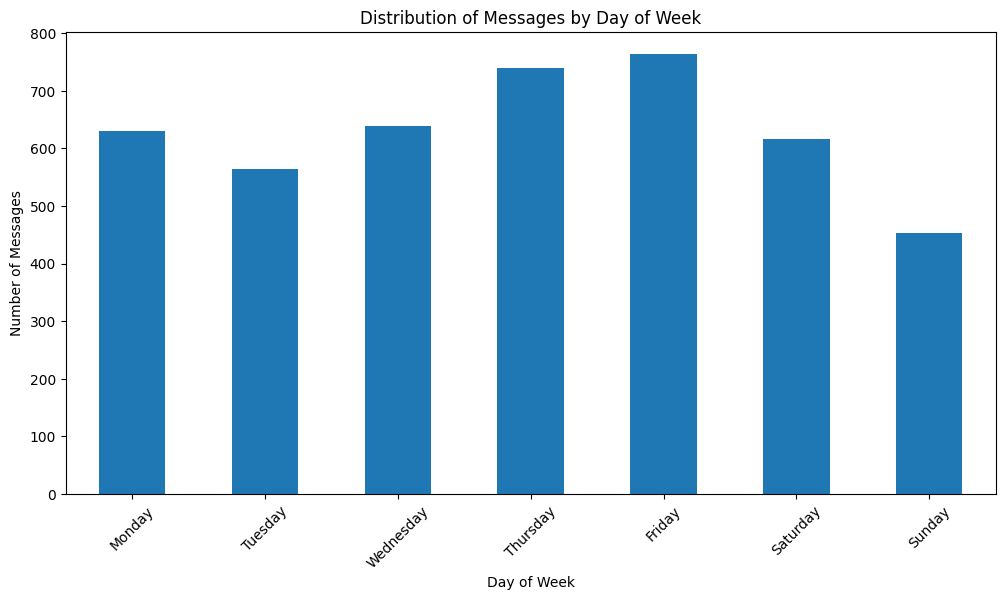

Most active day: Friday


In [26]:
# Day of Week Analysis
df['day_of_week'] = df['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
df['day_of_week'].value_counts().reindex(day_order).plot(kind='bar')
plt.title('Distribution of Messages by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show()

most_active_day = df['day_of_week'].value_counts().idxmax()
print(f"Most active day: {most_active_day}")

<Figure size 1500x800 with 0 Axes>

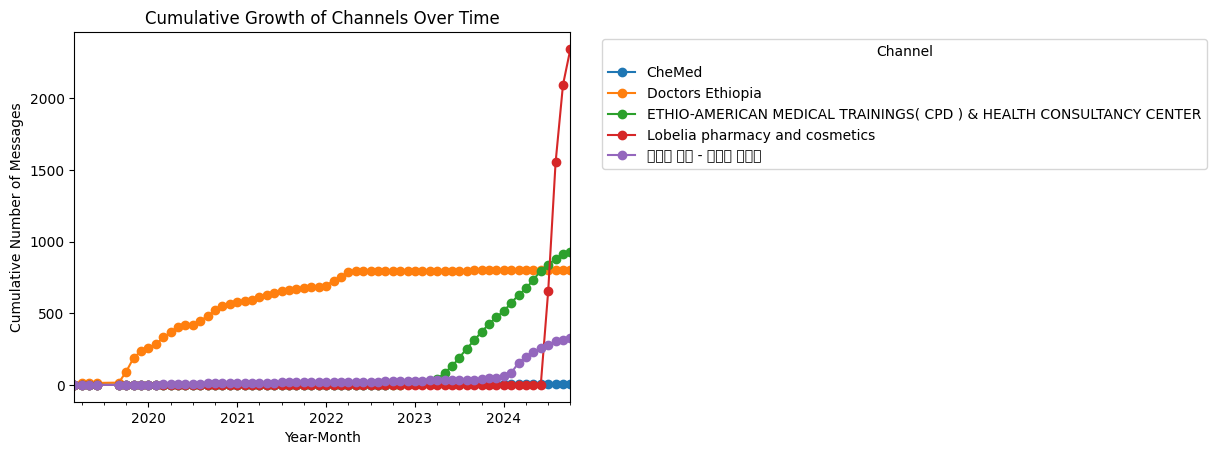

Top 5 fastest growing channels:
Channel Title
Lobelia pharmacy and cosmetics                                         35.515152
ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEALTH CONSULTANCY CENTER    14.015152
Doctors Ethiopia                                                       12.151515
የጤና ወግ - የጤና መረጃ                                                        4.939394
CheMed                                                                  0.106061
dtype: float64


In [27]:
# Channel Growth Over Time
df['YearMonth'] = df['Date'].dt.to_period('M')
channel_growth = df.groupby(['YearMonth', 'Channel Title']).size().unstack(fill_value=0).cumsum()

plt.figure(figsize=(15, 8))
channel_growth.plot(kind='line', marker='o')
plt.title('Cumulative Growth of Channels Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Number of Messages')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Top 5 fastest growing channels:")
growth_rate = (channel_growth.iloc[-1] - channel_growth.iloc[0]) / len(channel_growth)
print(growth_rate.sort_values(ascending=False).head())

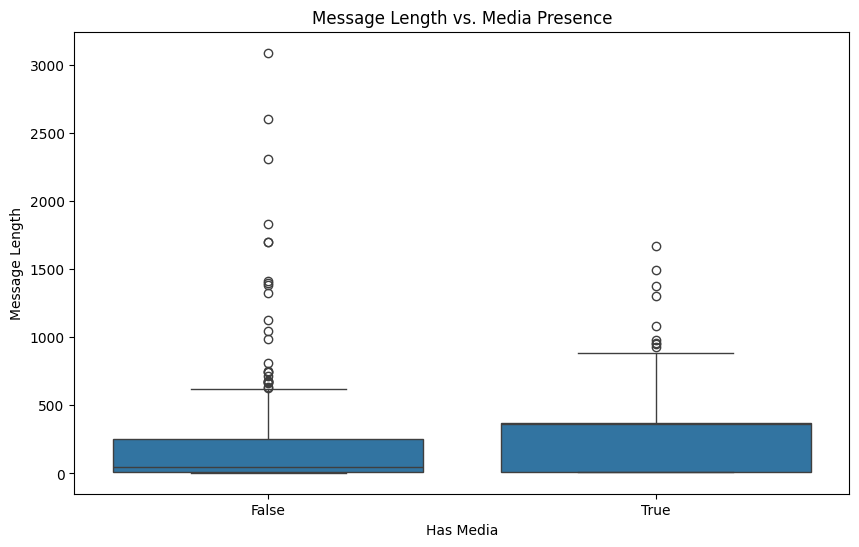

Average message length:
has_media
False    213.459075
True     241.648885
Name: message_length, dtype: float64


In [28]:
# Message Length vs. Engagement (assuming more media indicates more engagement)
df['has_media'] = df['Media Path'] != 'No media'

plt.figure(figsize=(10, 6))
sns.boxplot(x='has_media', y='message_length', data=df)
plt.title('Message Length vs. Media Presence')
plt.xlabel('Has Media')
plt.ylabel('Message Length')
plt.show()

print("Average message length:")
print(df.groupby('has_media')['message_length'].mean())

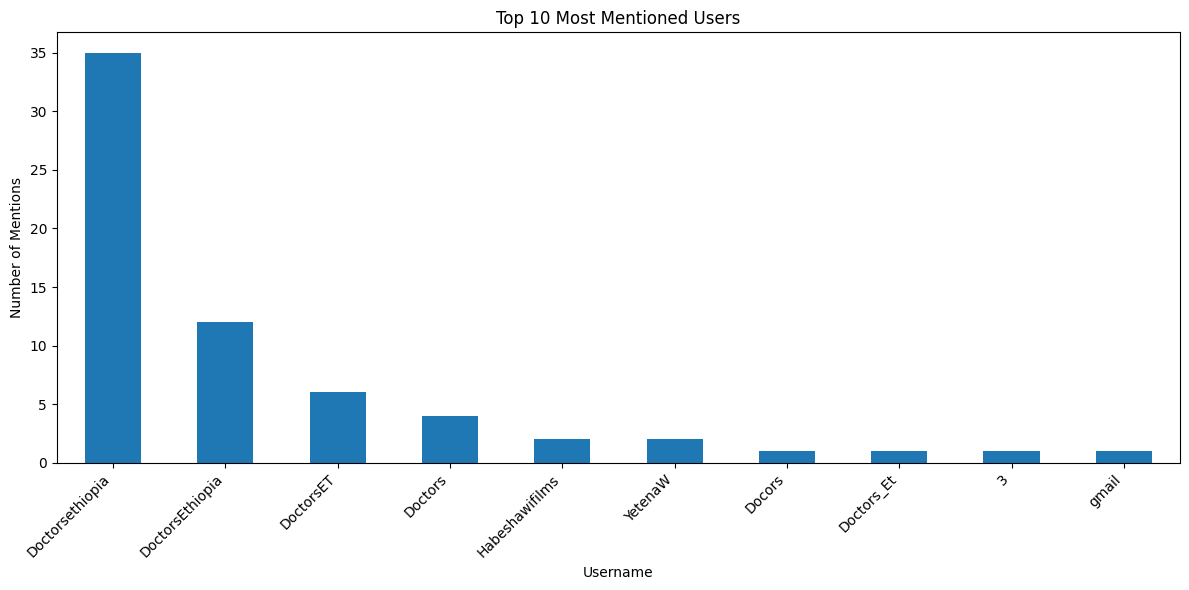

Top 5 most mentioned users:
Doctorsethiopia    35
DoctorsEthiopia    12
DoctorsET           6
Doctors             4
Habeshawifilms      2
Name: count, dtype: int64


In [29]:
# Most Active Users (if usernames are available in the messages)
import re

def extract_usernames(text):
    return re.findall(r'@(\w+)', text)

df['mentioned_users'] = df['Message'].apply(extract_usernames)
all_mentions = [user for sublist in df['mentioned_users'] for user in sublist]

plt.figure(figsize=(12, 6))
pd.Series(all_mentions).value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Mentioned Users')
plt.xlabel('Username')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 5 most mentioned users:")
print(pd.Series(all_mentions).value_counts().head())

Top 10 words for each topic:
Topic 1: e1, እና, ነው, https, ላይ, 88, ውስጥ, ሰዎች, youtu, ምን
Topic 2: message, 10000, biotin, mcg, meba, entertainment, ሰዎች, doctorsethiopia, new, doctor
Topic 3: 3600, 800gm, aptamil, natures, multivitamin, bounty, 00, collagen, sensitive, vitafusion
Topic 4: birr, 200, 00, እስከ, monday, lobelia4cosmetics, ብር, አማራጭ, high, open
Topic 5: ኢትዮጵያ, ዶክተርስ, ethiopia, እና, ቴሌቪዥን, ፋና, ምሽት, https, ላይ, doctors


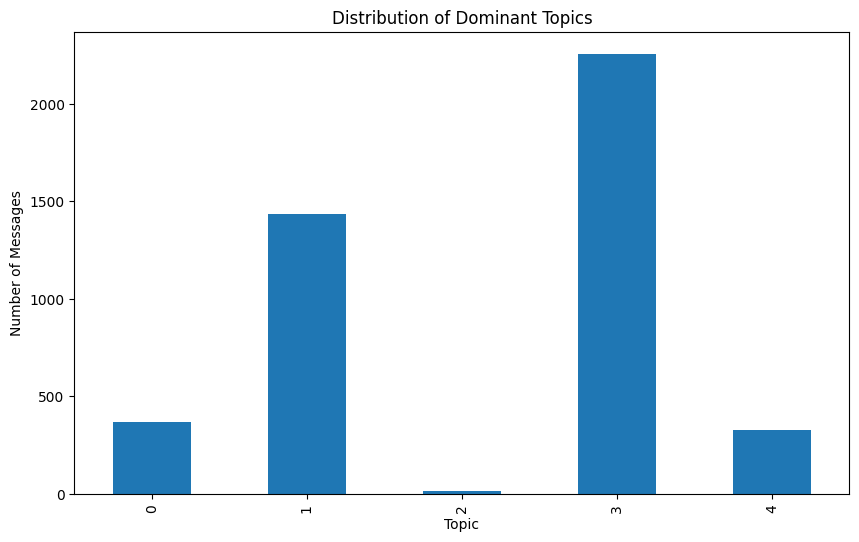

In [30]:
#Topic Modeling (using LDA)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare the data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['Message'])

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Function to print top words for each topic
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Print the topics
print("Top 10 words for each topic:")
print_topics(lda_model, vectorizer.get_feature_names_out(), 10)

# Assign topics to messages
df['dominant_topic'] = lda_output.argmax(axis=1)

# Plot topic distribution
plt.figure(figsize=(10, 6))
df['dominant_topic'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Messages')
plt.show()

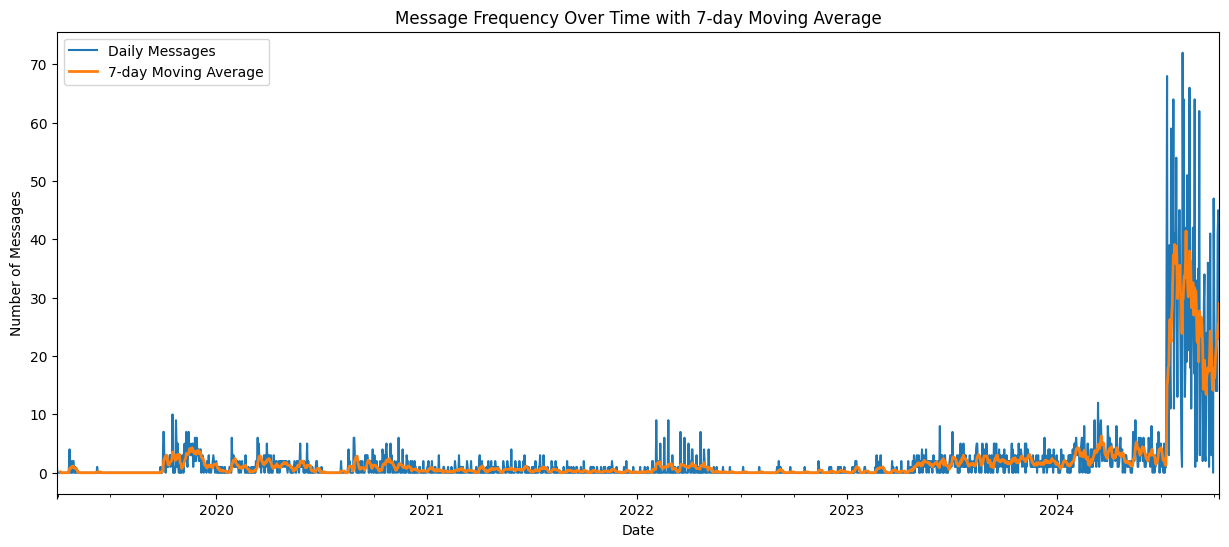

Peak day: 2024-08-07 00:00:00+00:00 with 72 messages


In [31]:
#Message Frequency Over Time with Moving Average
df['Date'] = pd.to_datetime(df['Date'])
daily_messages = df.resample('D', on='Date').size()
moving_average = daily_messages.rolling(window=7).mean()

plt.figure(figsize=(15, 6))
daily_messages.plot(label='Daily Messages')
moving_average.plot(label='7-day Moving Average', linewidth=2)
plt.title('Message Frequency Over Time with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend()
plt.show()

print(f"Peak day: {daily_messages.idxmax()} with {daily_messages.max()} messages")

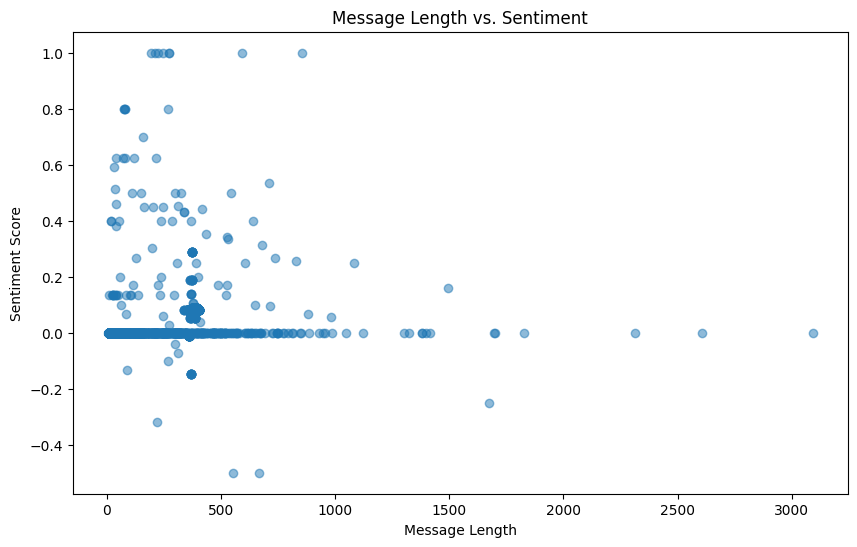

Correlation between message length and sentiment: 0.35


In [32]:
#Correlation between Message Length and Sentiment
plt.figure(figsize=(10, 6))
plt.scatter(df['message_length'], df['sentiment'], alpha=0.5)
plt.title('Message Length vs. Sentiment')
plt.xlabel('Message Length')
plt.ylabel('Sentiment Score')
plt.show()

correlation = df['message_length'].corr(df['sentiment'])
print(f"Correlation between message length and sentiment: {correlation:.2f}")

In [33]:
# Summary of Insights

# Calculate channel engagement
channel_engagement = df['Channel Title'].value_counts()

# Calculate media usage
media_usage = df['Media Path'].apply(lambda x: 'Has Media' if x != 'No media' else 'No Media').value_counts()

# Calculate most active hour and day
most_active_hour = df['Date'].dt.hour.mode().iloc[0]
most_active_day = df['Date'].dt.day_name().mode().iloc[0]

# Calculate daily messages
daily_messages = df.resample('D', on='Date').size()

print("Summary of Key Insights:")
print("1. Message Distribution:")
print(f"   - Total messages analyzed: {len(df)}")
print(f"   - Average message length: {df['message_length'].mean():.2f} characters")
print(f"   - Most active hour: {most_active_hour}:00 - {most_active_hour+1}:00")
print(f"   - Most active day: {most_active_day}")

print("\n2. Channel Activity:")
print(f"   - Total channels: {df['Channel Title'].nunique()}")
print(f"   - Most active channel: {channel_engagement.index[0]} with {channel_engagement.iloc[0]} messages")

print("\n3. Media Usage:")
print(f"   - Messages with media: {media_usage['Has Media'] / len(df) * 100:.2f}%")

print("\n4. Sentiment Analysis:")
print(f"   - Average sentiment score: {df['sentiment'].mean():.2f}")

print("\n5. Topic Modeling:")
print(f"   - Number of topics identified: {lda_model.n_components}")
print("   - Most prevalent topic: Topic", df['dominant_topic'].mode()[0] + 1)

print("\n6. User Engagement:")
all_mentions = [user for sublist in df['mentioned_users'] for user in sublist]
print(f"   - Most mentioned user: @{pd.Series(all_mentions).value_counts().index[0]}")
print(f"   - Number of unique mentioned users: {len(set(all_mentions))}")

print("\n7. Temporal Patterns:")
print(f"   - Peak messaging day: {daily_messages.idxmax().strftime('%Y-%m-%d')}")
print(f"   - Average messages per day: {daily_messages.mean():.2f}")

print("\n8. Content Characteristics:")
correlation = df['message_length'].corr(df['sentiment'])
print(f"   - Correlation between message length and sentiment: {correlation:.2f}")

Summary of Key Insights:
1. Message Distribution:
   - Total messages analyzed: 4405
   - Average message length: 239.85 characters
   - Most active hour: 13:00 - 14:00
   - Most active day: Friday

2. Channel Activity:
   - Total channels: 5
   - Most active channel: Lobelia pharmacy and cosmetics with 2344 messages

3. Media Usage:
   - Messages with media: 93.62%

4. Sentiment Analysis:
   - Average sentiment score: 0.05

5. Topic Modeling:
   - Number of topics identified: 5
   - Most prevalent topic: Topic 4

6. User Engagement:
   - Most mentioned user: @Doctorsethiopia
   - Number of unique mentioned users: 19

7. Temporal Patterns:
   - Peak messaging day: 2024-08-07
   - Average messages per day: 2.18

8. Content Characteristics:
   - Correlation between message length and sentiment: 0.35


In [34]:
# Save cleaned data
cleaned_csv_path = ('../scripts/cleaned_merged_data.csv')
df.to_csv(cleaned_csv_path, index=False)
logging.info(f"Saved cleaned data to {cleaned_csv_path}")
print(f"Cleaned data saved to {cleaned_csv_path}")

Cleaned data saved to ../scripts/cleaned_merged_data.csv
